In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [196]:
# Study Result Head

study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [197]:
# Merged DataFrame and Display 
m_data_complete = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')
m_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [198]:
# Number of Mice

mice_count= m_data_complete["Mouse ID"].nunique()
mice_count

249

In [199]:
# Duplicate Mouse ID and Timepoint

dup_id= m_data_complete.loc[m_data_complete.duplicated(subset=["Mouse ID", 'Timepoint']),'Mouse ID'].unique()
dup_id

array(['g989'], dtype=object)

In [200]:
# Data of Duplicated Mouse

dup_id_df= m_data_complete.loc[m_data_complete["Mouse ID"] == "g989", :]
dup_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [201]:
# Clean DataFrame and Display

updated_df= m_data_complete[m_data_complete['Mouse ID'].isin(dup_id)==False]
updated_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [202]:
# Count with duplicate removed

mice_count= updated_df["Mouse ID"].nunique()
mice_count

248

In [203]:
# Summary Statistics
mean = updated_df["Tumor Volume (mm3)"].groupby(updated_df["Drug Regimen"]).mean()
median = updated_df["Tumor Volume (mm3)"].groupby(updated_df["Drug Regimen"]).median()
variance = updated_df["Tumor Volume (mm3)"].groupby(updated_df["Drug Regimen"]).var()
std_dev = updated_df["Tumor Volume (mm3)"].groupby(updated_df["Drug Regimen"]).std()
SEM = updated_df["Tumor Volume (mm3)"].groupby(updated_df["Drug Regimen"]).sem()

In [204]:
# Summary Statistics DataFrame

summary_df= pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Err.": SEM
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [205]:
# Aggregated Summary of the DataFrame

summary_df_agg = updated_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std','sem'])
summary_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [206]:
# Bar and Pie Chart
bar_count= updated_df["Drug Regimen"].value_counts()
bar_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

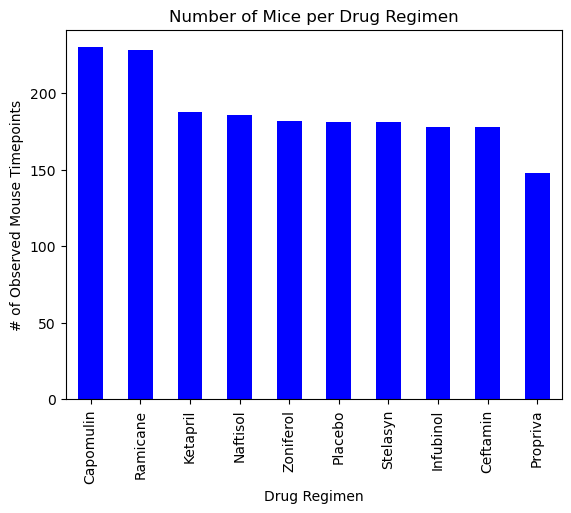

In [207]:
# Pandas Bar Chart

mice_plot= bar_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice per Drug Regimen")

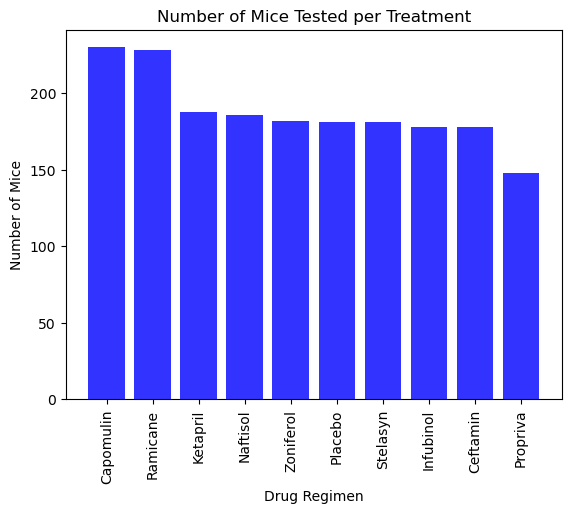

In [208]:
# Pyplot Bar Chart

x_axis = bar_count.index.values
y_axis = bar_count.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

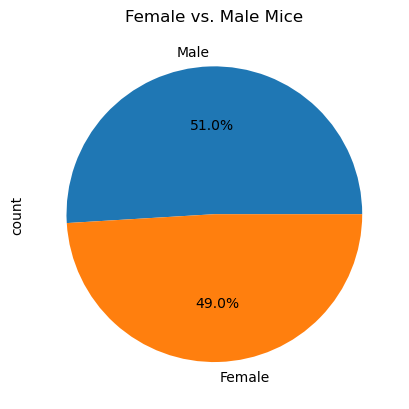

In [209]:
# Female vs Male Mice Pie Chart

gender_data = updated_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


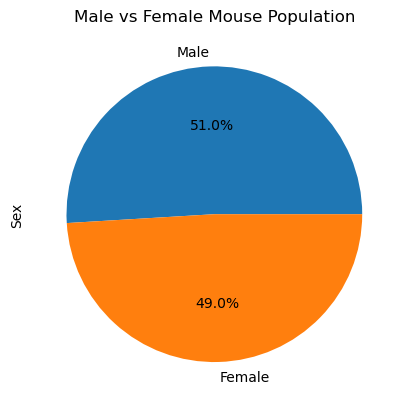

In [210]:
# Distribution of Female vs Male Mice Pyplot

labels = ['Female', 'Male']
sizes = [49, 51]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

In [211]:
# Data Frames for each Drug

Capomulin_df = updated_df.loc[updated_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = updated_df.loc[updated_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = updated_df.loc[updated_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = updated_df.loc[updated_df["Drug Regimen"] == "Ceftamin", :]


In [212]:
# Tumor Volumes across each regimen

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = updated_df[updated_df["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [213]:
# Finding last(greatest) timepoint for each mouse

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [214]:
# For loop and calculating quartiles for Box Plot

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"{drug} potential outliers: Series {lowerq, upperq, iqr, lower_bound, upper_bound}, Name: Tumor Volume (mm3), dtype: float64")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
Capomulin potential outliers: Series (32.38, 40.16, 7.78, 20.71, 51.83), Name: Tumor Volume (mm3), dtype: float64
------------------------------------------------------------
Ramicane potential outliers: Series (31.56, 40.66, 9.1, 17.91, 54.31), Name: Tumor Volume (mm3), dtype: float64
------------------------------------------------------------
Infubinol potential outliers: Series (54.05, 65.53, 11.48, 36.83, 82.75), Name: Tumor Volume (mm3), dtype: float64
------------------------------------------------------------
Ceftamin potential outliers: Series (48.72, 64.3, 15.58, 25.35, 87.67), Name: Tumor Volume (mm3), dtype: float64
------------------------------------------------------------


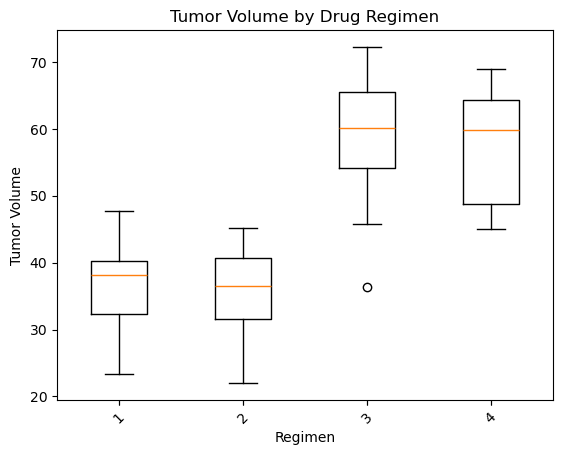

In [215]:
# Plotting the Box Plot

boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()
    

Text(0, 0.5, 'Tumor Volume (mm3)')

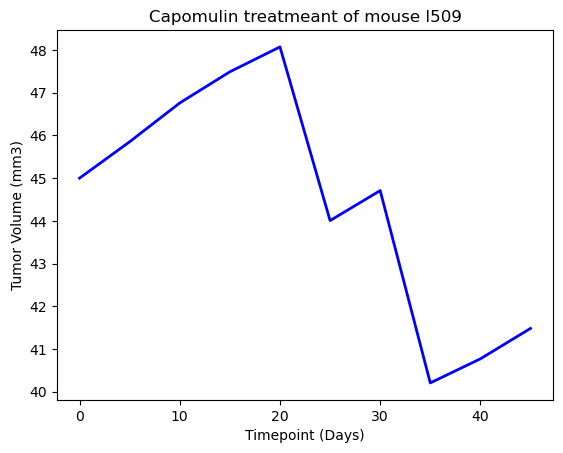

In [216]:
forline_df = drugs.loc[drugs["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

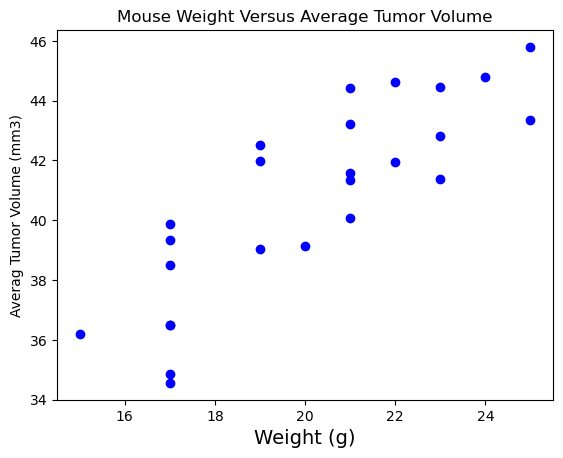

In [217]:
# Scatterplot of the mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capm_vol = Capomulin_df.groupby(["Mouse ID"]).mean(["Tumor Volume (mm3)"])

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

The correlation between mouse weight and the average tumor volume is 0.84


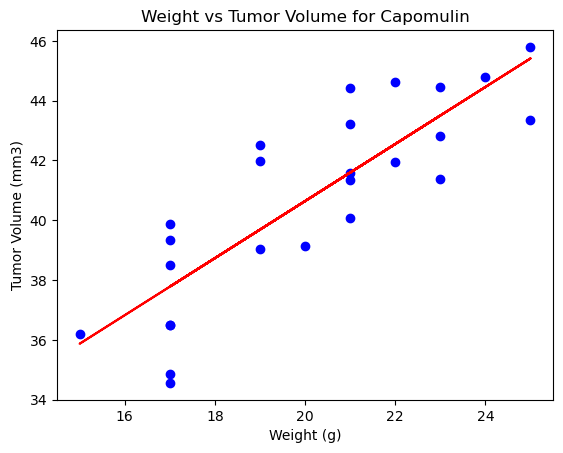

In [218]:
# Correlation and Linear Regression model

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
